# Statistical Analysis on factors influencing Liver disease

### Problem Statement

The problem is to understand and analyze the statistical relationships between the Function of Liver and 
various factors such as Age,Smoking, alcohol consumption, Diabetes, Hypertension,BMI etc. By building a machine learning model, my aim is to identify significant predictors of Liver Diseases and quantify their impacts.

### Objective
The main objective of this project is to develop a predictive model that accurately Diagnose if a person has liver disease or not,thereby providing insights for 
healthcare improvements


# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

# metrics evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Import data

In [2]:
df = pd.read_csv("Liver data.csv") 
df

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260527,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


# Data Analysis

In [3]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [4]:
df.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


##### Shape of the Dataset

In [7]:
df.shape

(1700, 11)

In [8]:
df.columns

Index(['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')

The Dataset has 11 columns from which the column "Diagnosis" is our Target.

### Data Description

The Dataset is taken from kaggle and the link is shared below.
Dataset : https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset

The Dataset Contains the Following columns:

1. Age: Range: 20 to 80 years.
2. Gender: Male (0) or Female (1).
3. BMI (Body Mass Index): Range: 15 to 40.
4. Alcohol Consumption: Range: 0 to 20 units per week.
5. Smoking: No (0) or Yes (1).
6. Genetic Risk: Low (0), Medium (1), High (2).
7. Physical Activity: Range: 0 to 10 hours per week.
8. Diabetes: No (0) or Yes (1).
9. Hypertension: No (0) or Yes (1).
10. Liver Function Test: Range: 20 to 100.
11. Diagnosis: Binary indicator (0 or 1) of liver disease presence.

# Exploratory Data Analysis

##### Check for Null values

In [9]:
df.isnull().all(axis=1).sum()

0

In [10]:
df.isnull().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

Check for Duplicate Values

In [11]:
df.duplicated().sum()

0

##### Identifying the number of Unique values for each feature

In [12]:
for i in df.columns: 
    unique = df[i].unique()
    nunique = df[i].nunique()
    print(i, ":\nUnique Values: ", unique, "\nNumber of unique values: ", nunique, "\n") 

Age :
Unique Values:  [58 71 48 34 62 27 80 40 77 38 42 30 43 72 55 59 22 41 21 63 49 57 79 52
 31 44 68 46 78 61 47 35 66 70 74 76 56 26 28 37 23 33 69 45 39 54 36 25
 73 53 29 50 67 64 60 20 24 32 51 75 65] 
Number of unique values:  61 

Gender :
Unique Values:  [0 1] 
Number of unique values:  2 

BMI :
Unique Values:  [35.85758415 30.73247015 19.97140694 ... 38.73001733 35.82079755
 24.06078307] 
Number of unique values:  1700 

AlcoholConsumption :
Unique Values:  [17.27282843  2.20126568 18.50094351 ...  6.32430245 16.89941707
  9.52644704] 
Number of unique values:  1700 

Smoking :
Unique Values:  [0 1] 
Number of unique values:  2 

GeneticRisk :
Unique Values:  [1 0 2] 
Number of unique values:  3 

PhysicalActivity :
Unique Values:  [0.65894018 1.67055669 9.92830825 ... 9.31422194 3.2244529  9.26142633] 
Number of unique values:  1700 

Diabetes :
Unique Values:  [0 1] 
Number of unique values:  2 

Hypertension :
Unique Values:  [0 1] 
Number of unique values:  2 

LiverFu

In [5]:
df['Gender'].replace({0: 'M', 1: 'F'}, inplace=True)
df['Gender'].unique()

array(['M', 'F'], dtype=object)

##### Identifying Numerical and categorical columns

In [6]:
num_col=df.select_dtypes(include=np.number)
num_col

,Age,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...
1695,42,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,27.600094,5.431009,0,0,8.390492,0,0,70.260527,1
1697,38,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


In [29]:
number_col=df.select_dtypes(include=np.number).columns
number_col

Index(['Age', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')

In [7]:
cat_col=df.select_dtypes(exclude=np.number).columns
cat_col

Index(['Gender'], dtype='object')

In [8]:
Gender=df['Gender'].value_counts()
Gender

Gender
F    857
M    843
Name: count, dtype: int64

There are 10 numerical columns and 1 categorical column in this dataset.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1700.0,50.394118,17.641915,20.000000,35.000000,51.000000,66.000000,80.000000
BMI,1700.0,27.699801,7.210400,15.004710,21.455414,27.925367,33.957668,39.992845
AlcoholConsumption,1700.0,9.832309,5.757472,0.003731,4.841811,9.828195,14.871671,19.952456
Smoking,1700.0,0.291765,0.454708,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1700.0,0.521765,0.666262,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1700.0,5.000993,2.847074,0.001852,2.622121,5.022883,7.401642,9.994964
Diabetes,1700.0,0.142353,0.349515,0.000000,0.000000,0.000000,0.000000,1.000000
Hypertension,1700.0,0.154706,0.361730,0.000000,0.000000,0.000000,0.000000,1.000000
LiverFunctionTest,1700.0,59.863867,22.996262,20.019254,40.024216,59.513146,79.428755,99.991413
Diagnosis,1700.0,0.550588,0.497581,0.000000,0.000000,1.000000,1.000000,1.000000


Diagnosis
1    936
0    764
Name: count, dtype: int64


Text(0.5, 1.0, 'Liver Diagnosis Distribution')

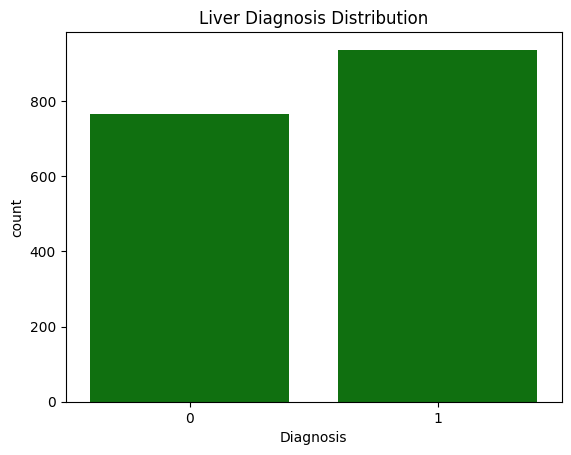

In [19]:
sns.countplot(x=df["Diagnosis"], color='g')
print(df["Diagnosis"].value_counts())
plt.title("Liver Diagnosis Distribution")

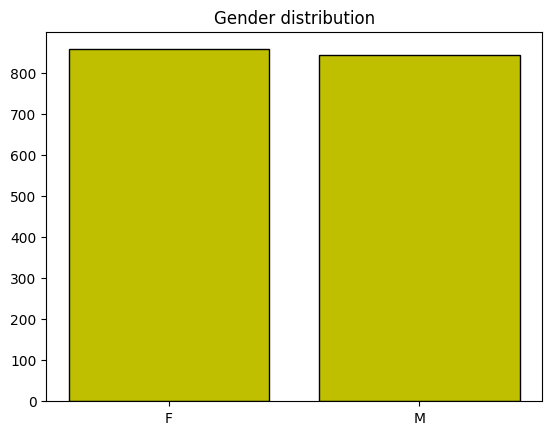

In [14]:
plt.bar(Gender.index,Gender.values, color='y',edgecolor='black')
plt.title("Gender distribution")
plt.show()

<Figure size 1000x500 with 0 Axes>

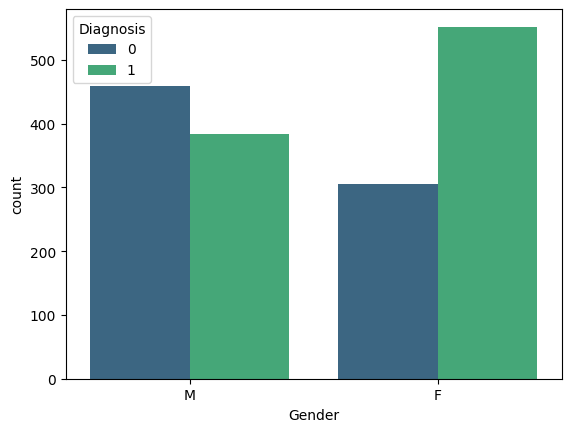

<Figure size 1000x500 with 0 Axes>

In [21]:
sns.countplot(x = 'Gender', data = df, hue = 'Diagnosis', palette = 'viridis')
plt.figure(figsize = (10,5))

<Figure size 1000x500 with 0 Axes>

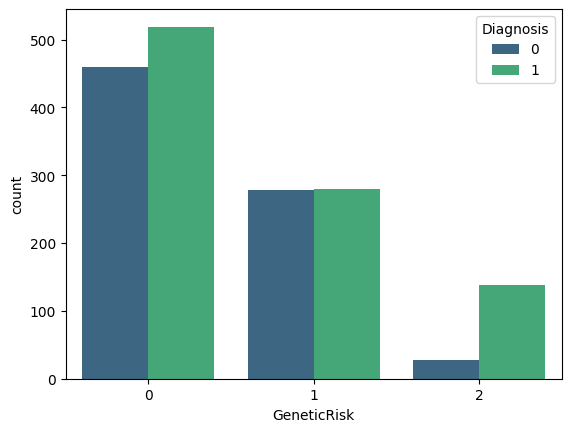

<Figure size 1000x500 with 0 Axes>

In [32]:
sns.countplot(x = 'GeneticRisk', data = df, hue = 'Diagnosis', palette = 'viridis')
plt.figure(figsize = (10,5))

It is observed that lower Genetic Risk has higher chances of liver Diagnosis.

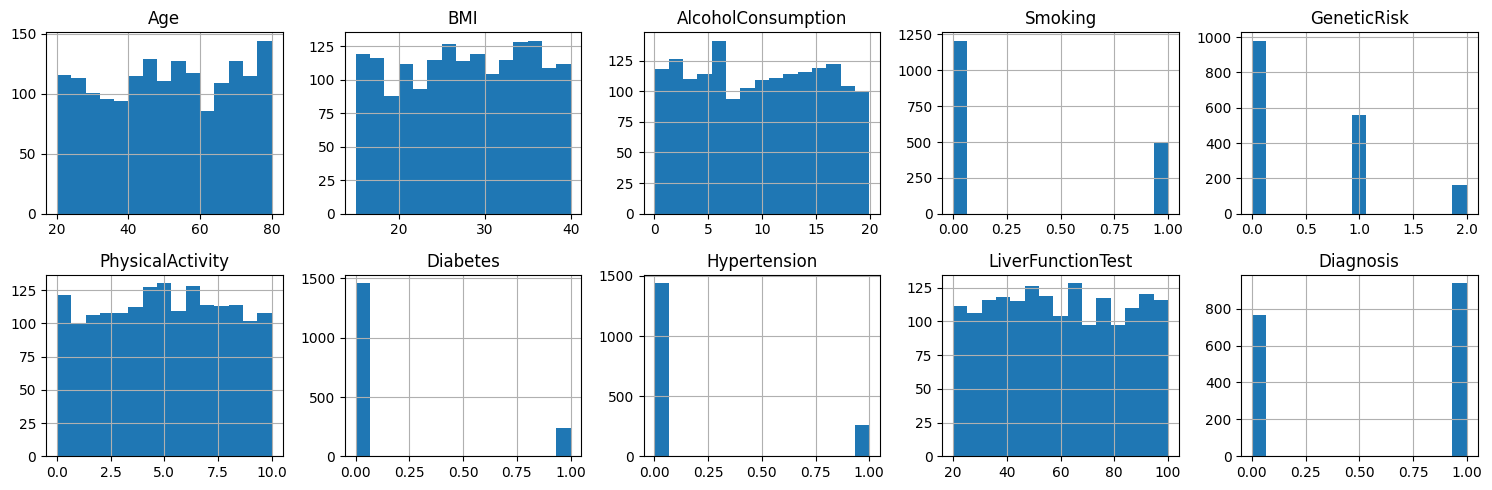

In [31]:
df[number_col].hist(bins=15, figsize=(15, 5), layout=(2, 5))
plt.tight_layout()
plt.show()

##### Correlation

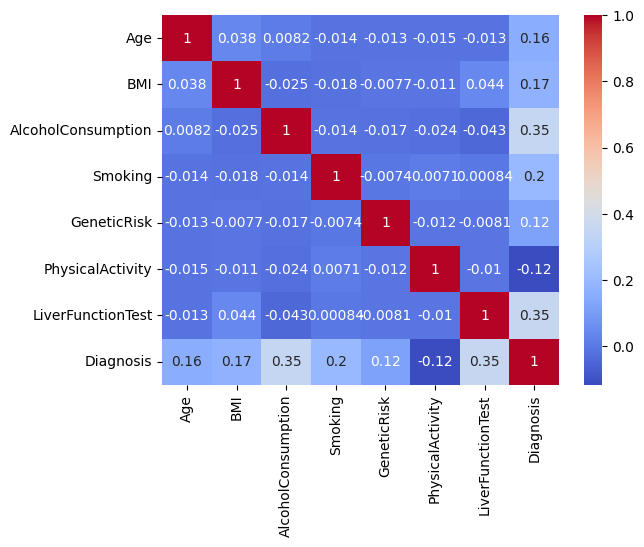

In [23]:
plot_df = df.drop([ 'Gender','Diabetes','Hypertension'], axis=1)
corr = plot_df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

From the correlation matrix it is very clear that there exist no multicolinearity between any features that would help in feature reduction.

##### Skeweness And Kurtosis

In [5]:
df1=df.drop(['Gender'],axis=1)
df1
skewness_value = skew(df1, axis=0, bias=True)
skewness_value

array([-0.04077164, -0.07187514,  0.0182162 ,  0.91617656,  0.90573089,
       -0.02338791,  2.04713805,  1.90968545,  0.04011549, -0.20339667])

In [25]:
for i in df1:
    print(f"Skewness of {i}: ", df1[i].skew())

positive_skewness = skewness_value[skewness_value > 1]
negative_skewness = skewness_value[skewness_value < -1]

print('\nVariables with positive skewness (skew > 1):\n', positive_skewness)

print('\nVariables with negative skewness (skew < -1):\n', negative_skewness)


Skewness of Age:  -0.04080765664233478
Skewness of BMI:  -0.07193863127743132
Skewness of AlcoholConsumption:  0.018232291907108695
Skewness of Smoking:  0.9169858628202702
Skewness of GeneticRisk:  0.9065309658417505
Skewness of PhysicalActivity:  -0.023408566494616225
Skewness of Diabetes:  2.048946384300334
Skewness of Hypertension:  1.9113723659364932
Skewness of LiverFunctionTest:  0.04015092216966745
Skewness of Diagnosis:  -0.20357634250158002

Variables with positive skewness (skew > 1):
 [2.04713805 1.90968545]

Variables with negative skewness (skew < -1):
 []


<Axes: xlabel='Hypertension', ylabel='Density'>

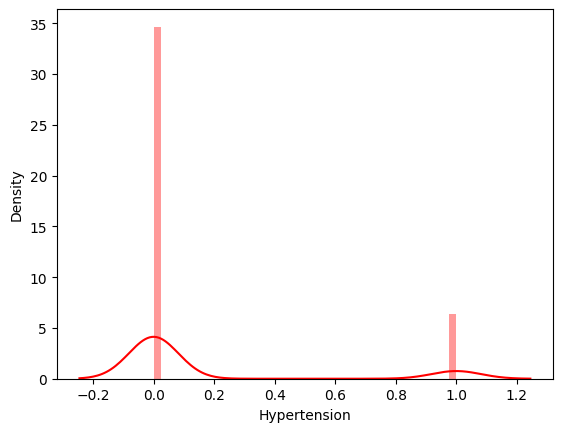

In [26]:
sns.distplot(df1["Hypertension"],color='r')

In [27]:
for i in df1:
    print(f"Kurtosis of {i}: ", kurtosis(df[i], fisher = False))

Kurtosis of Age:  1.8275591627191135
Kurtosis of BMI:  1.8198750906334027
Kurtosis of AlcoholConsumption:  1.77560185797626
Kurtosis of Smoking:  1.8393794877290741
Kurtosis of GeneticRisk:  2.6584324390603857
Kurtosis of PhysicalActivity:  1.8645833480096856
Kurtosis of Diabetes:  5.190774184040175
Kurtosis of Hypertension:  4.646898507928695
Kurtosis of LiverFunctionTest:  1.8145832623857752
Kurtosis of Diagnosis:  1.041370206291672


In [28]:
pd.crosstab(df1["Age"], df1["Diagnosis"], margins=True)

Diagnosis,0,1,All
Age,,,
20,19,14,33
21,15,15,30
22,14,14,28
23,14,11,25
24,22,9,31
...,...,...,...
77,11,20,31
78,13,12,25
79,13,21,34


OBSERVATIONS & INSIGHTS

1. No Null values and duplicate values are present in the dataset.
2. Gender was changed from 0,1 to Male and Female respectively. Also a Bar garph is plotted to show the distribution.
3. 10 Numerical columns and 1 categorical column is observed in the dataset.
4. out of 1700 datas, 764 people where not diagnosed whereas 936 people where diagnosed with liver disease. Out of which Female category was observed to be suffering more from the disease than females.
5. Correlation matrix is plotted and it is observed that there is no high correlation between most of the features in the dataset. But it is also evident that factors like Alcohol consumption and liver function test tends to give comparitively more positive relation with the diagnosis for the liver disease.
6. Skewness and Kurtosis results shows that factors like Diabetes and Hypertension has higher outliers compared to other features.
7. On crosstabulating Age and number of disease daignosed people, its observed above age of 75 the number of people getting liver disease is getting higher. Even at the age band of 20-25, the cases are 10 and more.

# Data Preprocessing

In [6]:
df2=df1.copy()
df2

,Age,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...
1695,42,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,27.600094,5.431009,0,0,8.390492,0,0,70.260527,1
1697,38,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


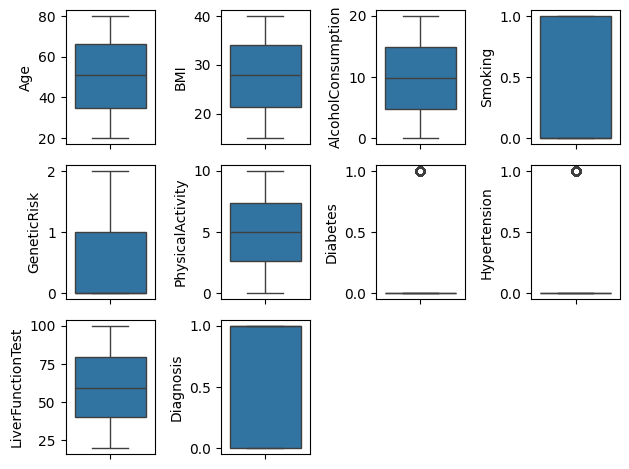

<Figure size 1000x3000 with 0 Axes>

In [30]:

for i, col in enumerate(num_col):
    plt.subplot(3, 4, i+1) 
    sns.boxplot(df[col]) 
    
plt.tight_layout()
plt.figure(figsize=(10, 30))
plt.show()

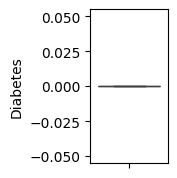

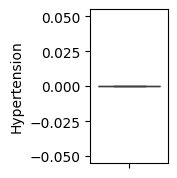

In [31]:
outliers = ["Diabetes","Hypertension"] 

for i in outliers:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    df.loc[df[i] < LL, i] = LL
    df.loc[df[i] > UL, i] = UL

    plt.figure(figsize = (1, 2))
    sns.boxplot(df[i])
    plt.show()

In [32]:
df2['log_Hypertension']=np.log(df2["Hypertension"])
df2['log_Hypertension']

0      -inf
1      -inf
2      -inf
3      -inf
4      -inf
       ... 
1695   -inf
1696   -inf
1697    0.0
1698   -inf
1699    0.0
Name: log_Hypertension, Length: 1700, dtype: float64

In [33]:
df2['log_Hypertension'].skew()

nan

In [34]:
kurtosis(df2['log_Hypertension'],fisher=False)

nan

In [7]:
df2['log_Diabetes']=np.log(df2["Diabetes"])
df2['log_Diabetes']

0      -inf
1       0.0
2      -inf
3      -inf
4       0.0
       ... 
1695   -inf
1696   -inf
1697   -inf
1698   -inf
1699   -inf
Name: log_Diabetes, Length: 1700, dtype: float64

In [8]:
df2['log_Diabetes'].skew()

nan

Since the features Diabetes and Hypertension gives a NAN value on log transformation which could be due to the presence of zero in the data. Also the outlier removal is not evident by the IQR method, hence, these features are dropped for further data analysis.

##### Remove unnecessary columns

In [34]:
Data=df.drop(['Diabetes','Hypertension'],axis=1)
Data

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,LiverFunctionTest,Diagnosis
0,58,M,35.857584,17.272828,0,1,0.658940,42.734240,1
1,71,F,30.732470,2.201266,0,1,1.670557,67.309822,1
2,48,M,19.971407,18.500944,0,0,9.928308,63.738956,0
3,34,F,16.615417,12.632870,0,0,5.630129,64.555873,1
4,62,F,16.065830,1.087815,0,1,3.566218,77.868689,1
...,...,...,...,...,...,...,...,...,...
1695,42,M,38.498295,14.384688,0,1,0.992289,97.933961,1
1696,40,M,27.600094,5.431009,0,0,8.390492,70.260527,1
1697,38,M,38.730017,6.324302,1,2,9.314222,56.053370,1
1698,67,M,35.820798,16.899417,0,2,3.224453,26.300875,1


In [38]:
Data.shape

(1700, 9)

Features like Diabetes and Hypertension are removed as there exist outliers for easy analysis of the data.

# VISUALISATIONS

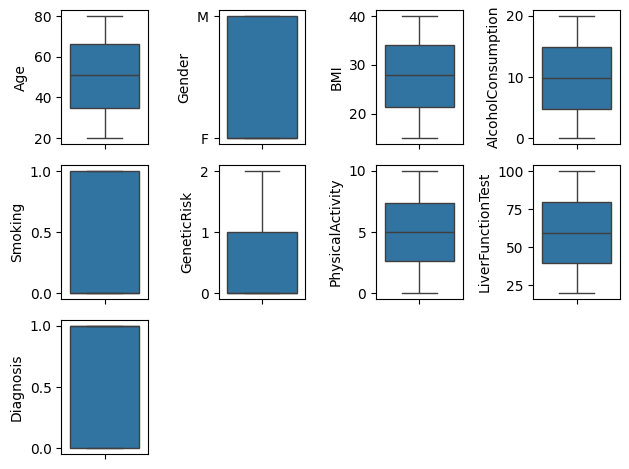

<Figure size 1000x3000 with 0 Axes>

In [39]:
for i, col in enumerate(Data):
    plt.subplot(3, 4, i+1) 
    sns.boxplot(Data[col]) 
    
plt.tight_layout()
plt.figure(figsize=(10, 30))
plt.show()

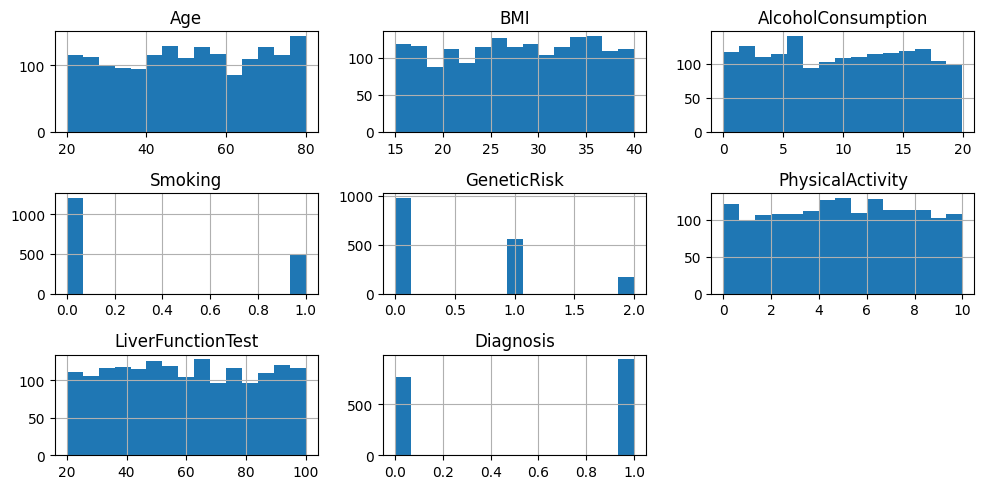

In [40]:
Data.hist(bins=15, figsize=(10, 5), layout=(3, 3))
plt.tight_layout()
plt.show()

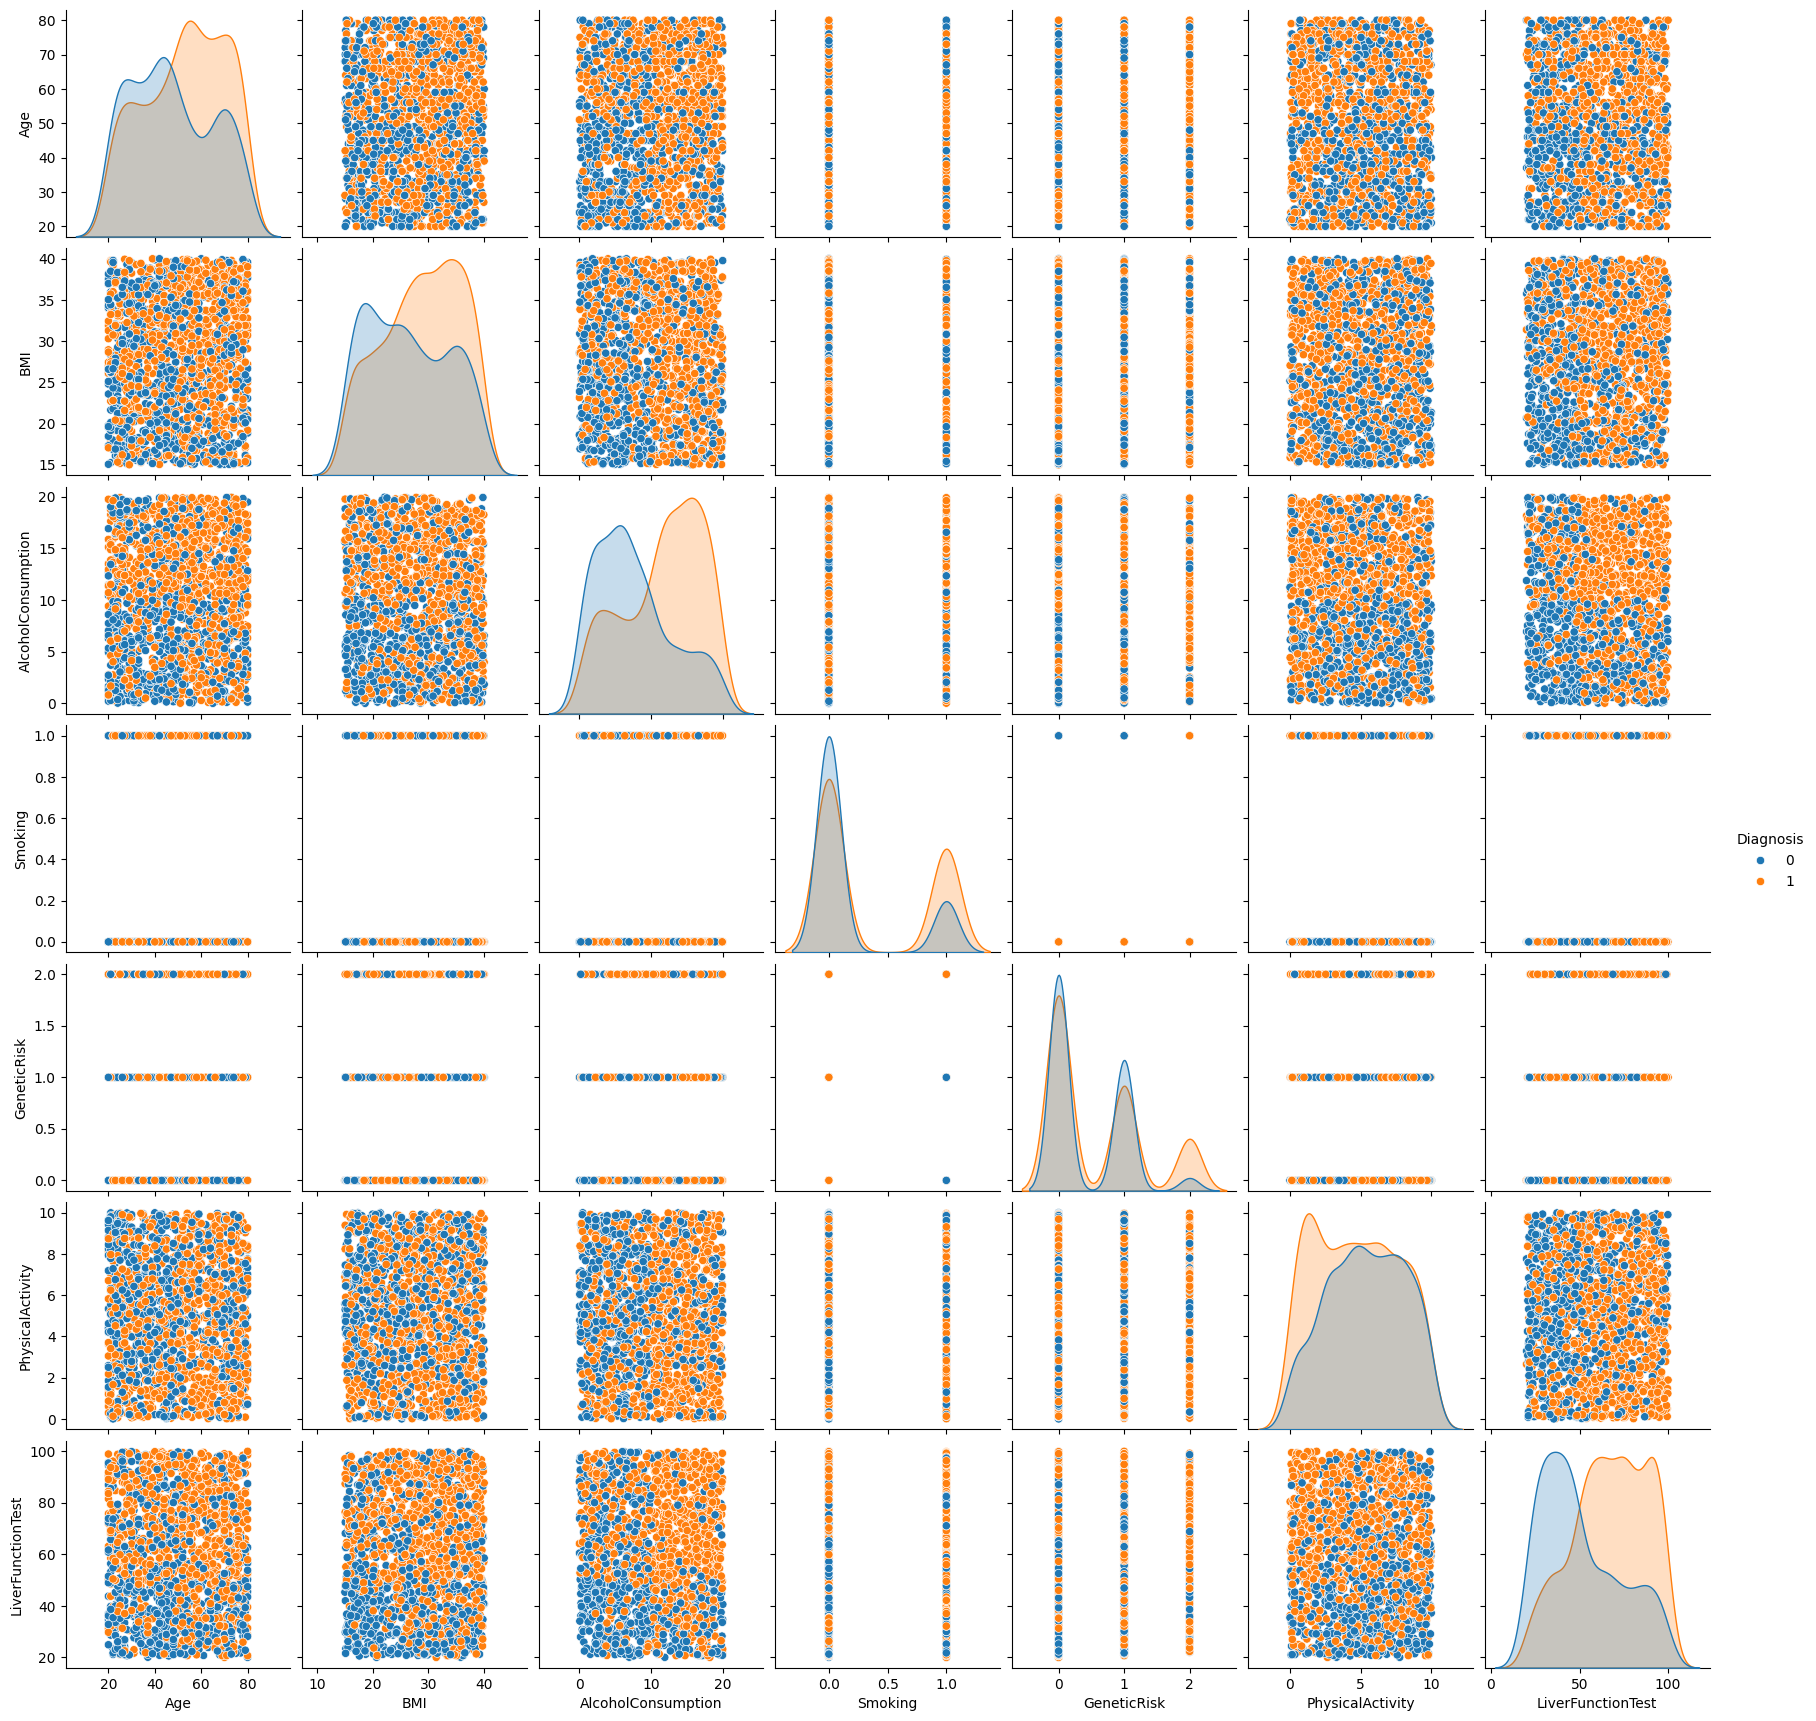

In [35]:
sns.pairplot(Data,hue='Diagnosis')

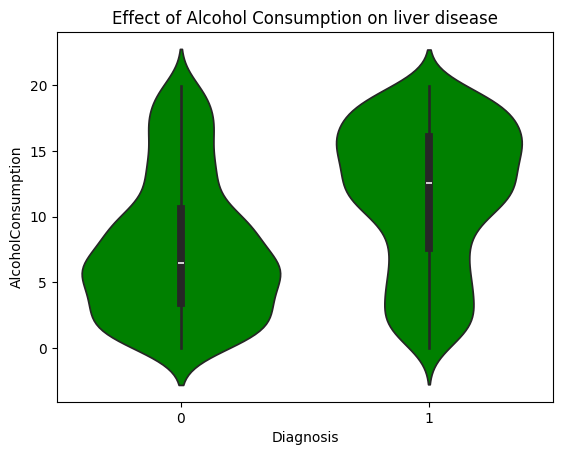

In [37]:
sns.violinplot(data=Data, x='Diagnosis', y='AlcoholConsumption',facecolor='green')
plt.title('Effect of Alcohol Consumption on liver disease')
plt.show()

Alcohol Consumption in disease diagnoised people are more than non-diseased people.

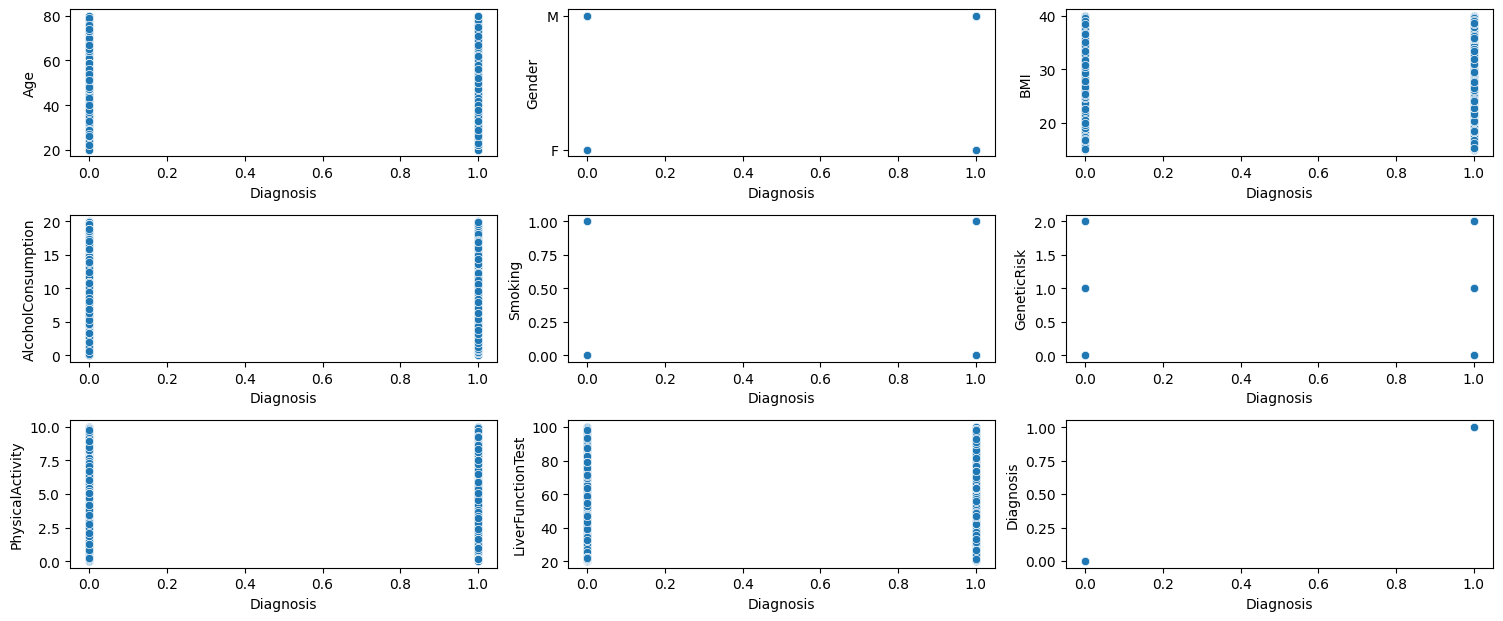

In [43]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(Data):
 plt.subplot(5, 3, i+1)
 sns.scatterplot(data=Data,y=col,x='Diagnosis')
 plt.xlabel('Diagnosis')
plt.tight_layout()
plt.show()

# Feature Engineering

In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   object 
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   LiverFunctionTest   1700 non-null   float64
 8   Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 119.7+ KB


In [40]:
Data_encoded = pd.get_dummies(Data, columns=['Gender'], drop_first=True)
Data_encoded

,Age,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,LiverFunctionTest,Diagnosis,Gender_M
0,58,35.857584,17.272828,0,1,0.658940,42.734240,1,True
1,71,30.732470,2.201266,0,1,1.670557,67.309822,1,False
2,48,19.971407,18.500944,0,0,9.928308,63.738956,0,True
3,34,16.615417,12.632870,0,0,5.630129,64.555873,1,False
4,62,16.065830,1.087815,0,1,3.566218,77.868689,1,False
...,...,...,...,...,...,...,...,...,...
1695,42,38.498295,14.384688,0,1,0.992289,97.933961,1,True
1696,40,27.600094,5.431009,0,0,8.390492,70.260527,1,True
1697,38,38.730017,6.324302,1,2,9.314222,56.053370,1,True
1698,67,35.820798,16.899417,0,2,3.224453,26.300875,1,True


In [46]:
Data_encoded.columns

Index(['Age', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'LiverFunctionTest', 'Diagnosis', 'Gender_M'],
      dtype='object')

In [41]:
x=Data_encoded.drop("Diagnosis", axis=1)
y=Data_encoded['Diagnosis']
x,y

(      Age        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
 0      58  35.857584           17.272828        0            1   
 1      71  30.732470            2.201266        0            1   
 2      48  19.971407           18.500944        0            0   
 3      34  16.615417           12.632870        0            0   
 4      62  16.065830            1.087815        0            1   
 ...   ...        ...                 ...      ...          ...   
 1695   42  38.498295           14.384688        0            1   
 1696   40  27.600094            5.431009        0            0   
 1697   38  38.730017            6.324302        1            2   
 1698   67  35.820798           16.899417        0            2   
 1699   80  24.060783            9.526447        0            0   
 
       PhysicalActivity  LiverFunctionTest  Gender_M  
 0             0.658940          42.734240      True  
 1             1.670557          67.309822     False  
 2             9.928308      

In [48]:
x.shape

(1700, 8)

In [49]:
y.shape

(1700,)

In [42]:
# Feature Scaling
standard_scaler = StandardScaler()
scaled_x = standard_scaler.fit_transform(x) 
scaled_x

array([[ 0.43125252,  1.13172403,  1.29270431, ..., -1.52554193,
        -0.74510661,  1.00826949],
       [ 1.16835081,  0.42072021, -1.32580581, ..., -1.1701194 ,
         0.32388506, -0.99179834],
       [-0.13574615, -1.07215528,  1.50607513, ...,  1.73116874,
         0.1685591 ,  1.00826949],
       ...,
       [-0.70274483,  1.53021487, -0.60947574, ...,  1.51541493,
        -0.16574947,  1.00826949],
       [ 0.94155134,  1.12662065,  1.2278284 , ..., -0.62417168,
        -1.45992716,  1.00826949],
       [ 1.67864962, -0.50483872, -0.05314007, ...,  1.49686566,
         0.5963169 ,  1.00826949]])

In [43]:
scaled_x.shape

(1700, 8)

In [44]:
scaled_x=pd.DataFrame(scaled_x,columns=x.columns)
scaled_x

,Age,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,LiverFunctionTest,Gender_M
0,0.431253,1.131724,1.292704,-0.641841,0.718000,-1.525542,-0.745107,1.008269
1,1.168351,0.420720,-1.325806,-0.641841,0.718000,-1.170119,0.323885,-0.991798
2,-0.135746,-1.072155,1.506075,-0.641841,-0.783353,1.731169,0.168559,1.008269
3,-0.929544,-1.537730,0.486565,-0.641841,-0.783353,0.221042,0.204093,-0.991798
4,0.658052,-1.613973,-1.519255,-0.641841,0.718000,-0.504096,0.783176,-0.991798
...,...,...,...,...,...,...,...,...
1695,-0.475945,1.498068,0.790923,-0.641841,0.718000,-1.408423,1.655978,1.008269
1696,-0.589345,-0.013832,-0.764675,-0.641841,-0.783353,1.190870,0.452235,1.008269
1697,-0.702745,1.530215,-0.609476,1.558018,2.219353,1.515415,-0.165749,1.008269
1698,0.941551,1.126621,1.227828,-0.641841,2.219353,-0.624172,-1.459927,1.008269


Data encoding and feature scaling is conducted on the data for better performance and stability of machine learning algorithms.

# Data Splitting

In [45]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.3,random_state=44)

In [46]:
print('Shape training set: scaled_x:{}, y:{}'.format(x_train.shape, y_train.shape))
print('\nShape test set: scaled_x:{}, y:{}\n'.format(x_test.shape, y_test.shape))

Shape training set: scaled_x:(1190, 8), y:(1190,)

Shape test set: scaled_x:(510, 8), y:(510,)



# Model Selection 
### (Without Feature Selection & hyperparameter Tuning)

Models Selected:- Logistic regression, Decision Tree, Gradient Boost, Adaboost Classifier, Random Forest


In [47]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
round((accuracy_score(y_test,RF_pred)),4)

0.8765

In [48]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
round(accuracy_score(y_test,LR_pred),4)

0.8176

In [49]:
from sklearn.tree import DecisionTreeClassifier
dclf=DecisionTreeClassifier()
dclf.fit(x_train,y_train)
dclf_pred=dclf.predict(x_test)
round(accuracy_score(y_test,dclf_pred),4)

0.8255

In [50]:
Ab=AdaBoostClassifier()
Ab.fit(x_train,y_train)
Ab_pred=Ab.predict(x_test)
round(accuracy_score(y_test,Ab_pred),4)

0.8863

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
GB_pred=GB.predict(x_test)
round(accuracy_score(y_test,GB_pred),4)

0.8843

In [53]:
print("confusion matrix")

print("\nLogistic Regression : ")
print(confusion_matrix(y_test,LR_pred))
print("Decision tree : ")
print(confusion_matrix(y_test,dclf_pred))
print("Random forest : ")
print(confusion_matrix(y_test,RF_pred))
print("Adaboost : ")
print(confusion_matrix(y_test,Ab_pred))
print("Gradient Boosting : ")
print(confusion_matrix(y_test,GB_pred))

confusion matrix

Logistic Regression : 
[[175  44]
 [ 49 242]]
Decision tree : 
[[175  44]
 [ 45 246]]
Random forest : 
[[189  30]
 [ 33 258]]
Adaboost : 
[[194  25]
 [ 33 258]]
Gradient Boosting : 
[[190  29]
 [ 30 261]]


In [54]:
print("CLASSIFICATION_REPORT")

print("\nLogistic regression : ")
print(classification_report(y_test,LR_pred))
print("Decision tree : ")
print(classification_report(y_test,dclf_pred))
print("Random forest : ")
print(classification_report(y_test,RF_pred))
print("Adaboost : ")
print(classification_report(y_test,Ab_pred))
print("Gradient Boosting : ")
print(classification_report(y_test,GB_pred))

CLASSIFICATION_REPORT

Logistic regression : 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       219
           1       0.85      0.83      0.84       291

    accuracy                           0.82       510
   macro avg       0.81      0.82      0.81       510
weighted avg       0.82      0.82      0.82       510

Decision tree : 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       219
           1       0.85      0.85      0.85       291

    accuracy                           0.83       510
   macro avg       0.82      0.82      0.82       510
weighted avg       0.83      0.83      0.83       510

Random forest : 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       219
           1       0.90      0.89      0.89       291

    accuracy                           0.88       510
   macro avg       0.87      0.87      0.87     

Based on the above report:

AdaBoost achieve the highest accuracy of 89% followed by Random Forest and Gradient Boost with 88% accuracy.
Also they exhibit higher precision, recall, and F1-score for both classes, with balanced macro and weighted averages.
Bagging Classifier also shows good performance, with an accuracy of 84% and balanced precision, recall, and F1-score.
Decision Tree and Logistic Regression have slightly lower accuracy (82% each), but still showcases a balanced performance.

It's advisable to conduct further analysis, such as feature selection and hyperparameter tuning to ensure the suitability of the chosen model for the given classification tasks.

# Feature Selection

### 1.SelecKBbest

In [55]:
from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=7)
x_kbest = selector_kbest.fit_transform(x_train, y_train)

# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest = x_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['Age', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'LiverFunctionTest', 'Gender_M'],
      dtype='object')


In [56]:
X1 = scaled_x[['Age', 'BMI', 'AlcoholConsumption', 'Smoking','LiverFunctionTest', 'Gender_M','GeneticRisk']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.3,random_state = 44)

In [57]:
RF.fit(X1_train,y1_train)
RF_pred=RF.predict(X1_test)

LR.fit(X1_train,y1_train)
LR_pred=LR.predict(X1_test)

dclf.fit(X1_train,y1_train)
dclf_pred=dclf.predict(X1_test)

Ab.fit(X1_train,y1_train)
Ab_pred=Ab.predict(X1_test)

GB.fit(X1_train,y1_train)
GB_pred=GB.predict(X1_test)

In [66]:
print("CLASSIFICATION_REPORT")

print("\nLogistic regression : ")
print(classification_report(y1_test,LR_pred))
print("Decision tree : ")
print(classification_report(y1_test,dclf_pred))
print("Random forest : ")
print(classification_report(y1_test,RF_pred))
print("Adaboost : ")
print(classification_report(y1_test,Ab_pred))
print("Gradient Boosting : ")
print(classification_report(y1_test,GB_pred))

CLASSIFICATION_REPORT

Logistic regression : 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       219
           1       0.85      0.82      0.83       291

    accuracy                           0.81       510
   macro avg       0.81      0.81      0.81       510
weighted avg       0.82      0.81      0.81       510

Decision tree : 
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       219
           1       0.84      0.79      0.81       291

    accuracy                           0.79       510
   macro avg       0.79      0.79      0.79       510
weighted avg       0.80      0.79      0.79       510

Random forest : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       219
           1       0.89      0.87      0.88       291

    accuracy                           0.86       510
   macro avg       0.86      0.86      0.86     

# 2.Lasso

In [30]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


lasso_model = Lasso(alpha=0.1) 

# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=7)
X_lasso = selector_lasso.fit_transform(x_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Print selected feature names
selected_features_lasso = x_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

Selected features using SelectFromModel with Lasso: Index(['AlcoholConsumption', 'LiverFunctionTest'], dtype='object')


In [31]:
X2 = scaled_x[['AlcoholConsumption', 'LiverFunctionTest']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.3,random_state = 44)

In [32]:
RF.fit(X2_train,y2_train)
RF_pred=RF.predict(X2_test)

LR.fit(X2_train,y2_train)
LR_pred=LR.predict(X2_test)

dclf.fit(X2_train,y2_train)
dclf_pred=dclf.predict(X2_test)

Ab.fit(X2_train,y2_train)
Ab_pred=Ab.predict(X2_test)

GB.fit(X2_train,y2_train)
GB_pred=GB.predict(X2_test)

In [70]:
print("CLASSIFICATION_REPORT")

print("\nLogistic regression : ")
print(classification_report(y2_test,LR_pred))
print("Decision tree : ")
print(classification_report(y2_test,dclf_pred))
print("Random forest : ")
print(classification_report(y2_test,RF_pred))
print("Adaboost : ")
print(classification_report(y2_test,Ab_pred))
print("Gradient Boosting : ")
print(classification_report(y2_test,GB_pred))

CLASSIFICATION_REPORT

Logistic regression : 
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       219
           1       0.76      0.77      0.76       291

    accuracy                           0.73       510
   macro avg       0.72      0.72      0.72       510
weighted avg       0.73      0.73      0.73       510

Decision tree : 
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       219
           1       0.70      0.75      0.72       291

    accuracy                           0.68       510
   macro avg       0.67      0.67      0.67       510
weighted avg       0.67      0.68      0.67       510

Random forest : 
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       219
           1       0.72      0.71      0.72       291

    accuracy                           0.68       510
   macro avg       0.67      0.67      0.67     

# 3.RFE using RandomForest Classifier

In [33]:
from sklearn.feature_selection import RFE

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=44)

# RFE with Random Forest regressor
rfe_selector_classifier = RFE(estimator=rf_classifier, n_features_to_select=7, step=1)
X_rfe_classifier = rfe_selector_classifier.fit_transform(x_train, y_train)

# Get the selected feature indices
selected_indices_rfe_classifier = rfe_selector_classifier.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe_classifier = x_train.columns[selected_indices_rfe_classifier]
print("Selected features using RFE with Random Forest Classifier:", selected_features_rfe_classifier)

Selected features using RFE with Random Forest Classifier: Index(['Age', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'LiverFunctionTest'],
      dtype='object')


In [35]:
X3=scaled_x[['Age', 'BMI', 'AlcoholConsumption','Smoking','GeneticRisk', 'PhysicalActivity',
       'LiverFunctionTest']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,test_size = 0.3,random_state = 44)

In [36]:
RF.fit(X3_train,y3_train)
RF_pred=RF.predict(X3_test)

LR.fit(X3_train,y3_train)
LR_pred=LR.predict(X3_test)

dclf.fit(X3_train,y3_train)
dclf_pred=dclf.predict(X3_test)

Ab.fit(X3_train,y3_train)
Ab_pred=Ab.predict(X3_test)

GB.fit(X3_train,y3_train)
GB_pred=GB.predict(X3_test)

In [74]:
print("CLASSIFICATION_REPORT")

print("\nLogistic regression : ")
print(classification_report(y3_test,LR_pred))
print("Decision tree : ")
print(classification_report(y3_test,dclf_pred))
print("Random forest : ")
print(classification_report(y3_test,RF_pred))
print("Adaboost : ")
print(classification_report(y3_test,Ab_pred))
print("Gradient Boosting : ")
print(classification_report(y3_test,GB_pred))

CLASSIFICATION_REPORT

Logistic regression : 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       219
           1       0.83      0.83      0.83       291

    accuracy                           0.81       510
   macro avg       0.80      0.80      0.80       510
weighted avg       0.81      0.81      0.81       510

Decision tree : 
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       219
           1       0.81      0.78      0.80       291

    accuracy                           0.77       510
   macro avg       0.77      0.77      0.77       510
weighted avg       0.77      0.77      0.77       510

Random forest : 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       219
           1       0.83      0.88      0.85       291

    accuracy                           0.83       510
   macro avg       0.83      0.82      0.82     

### Finding the feature importance using Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for i in sorted_indices:
 print(f"{x.columns[i]}: {feature_importances[i]}")

Feature Importances:
AlcoholConsumption: 0.25939354853520386
LiverFunctionTest: 0.23615337509058995
BMI: 0.13446182832658712
Age: 0.12356497840150725
PhysicalActivity: 0.11475223503518382
GeneticRisk: 0.055216820069793664
Gender_M: 0.03911439189644621
Smoking: 0.03734282264468829


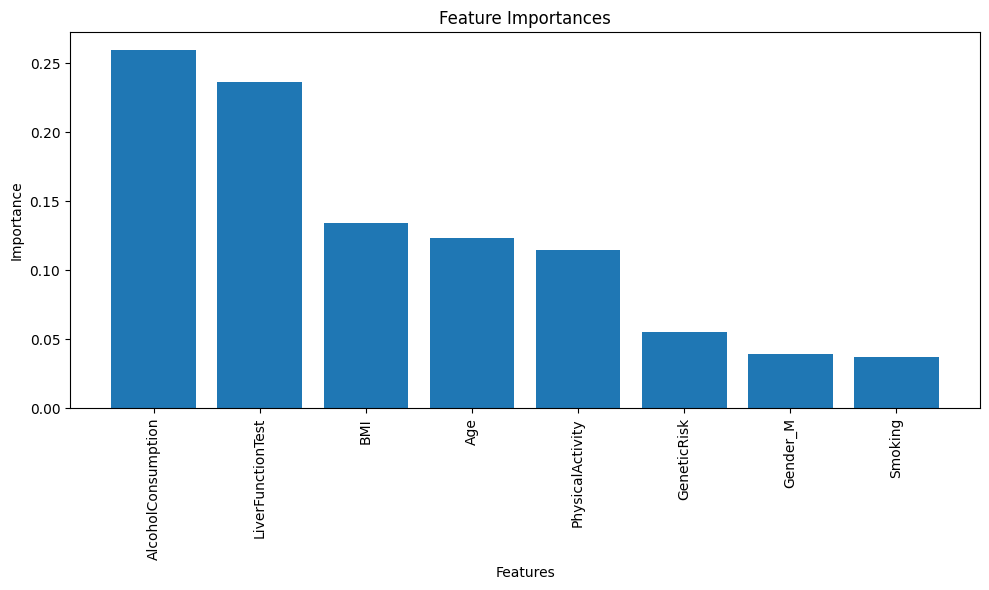

In [38]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [x.columns[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

1. By using different feature selection Methods like Selectkbest, lasso and RFE and confining the feature number to 7, it is clearly observed from the Classification Report of the data that the Evaluation Matrix shows a higher value for the SelectKbest method compared to the other two. Although RFE selection method gave us 7 Features, the performance of model is less compared to the prior one. 
2. In lasso method, the features got reduced to 2 and the accuracy range also went to below 75% for all the classifiers. 
3. Also the feature importance study using Random Forest shows that Smoking and Gender has very less impact on the target Reducing the deature number to 6.

# Hyperparameter Tuning

##### LOGISTIC REGRESSION

##### Data without Feature Selection

In [59]:
from sklearn.model_selection import GridSearchCV
import math

model = LogisticRegression()
parameters_grid={
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l2'],
'C' : [100, 10, 1.0, 0.1, 0.01]}

grid_search = GridSearchCV(estimator=model, param_grid=parameters_grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("LR Best Score: ",grid_result.best_score_)
print("LR Best Hyperparameters: ",grid_result.best_params_)

LR Best Score:  0.8100840336134454
LR Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [78]:
print("Train Score: ", grid_search.score(x_train,y_train) )
print("Test Score: ", grid_search.score(x_test,y_test) )

Train Score:  0.8159663865546218
Test Score:  0.8215686274509804


##### Data with Feature Selection

In [79]:
from sklearn.model_selection import GridSearchCV
import math

model_LR = LogisticRegression()
parameters_grid={
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l2'],
'C' : [100, 10, 1.0, 0.1, 0.01]}

grid_search = GridSearchCV(estimator=model_LR, param_grid=parameters_grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)

print("LR Best Score: ",grid_result.best_score_)
print("LR Best Hyperparameters: ",grid_result.best_params_)

LR Best Score:  0.8008403361344538
LR Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


##### DECISION TREE

##### Data without Feature Selection

In [80]:
model = DecisionTreeClassifier()
parameters_grid={'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=model, param_grid=parameters_grid, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("DT Best Score: ",grid_result.best_score_)
print("DT Best Hyperparameters: ",grid_result.best_params_)

DT Best Score:  0.8243697478991596
DT Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [81]:
print("Train Score: ", grid_search.score(x_train,y_train) )
print("Test Score: ", grid_search.score(x_test,y_test) )

Train Score:  0.9436974789915966
Test Score:  0.8490196078431372


##### Data with Feature Selection

In [82]:
model_DT = DecisionTreeClassifier()
parameters_grid={'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=model_DT, param_grid=parameters_grid, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)

print("DT Best Score: ",grid_result.best_score_)
print("DT Best Hyperparameters: ",grid_result.best_params_)

DT Best Score:  0.8243697478991597
DT Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


##### ADABOOST

##### Data without Feature Selection

In [60]:
model = AdaBoostClassifier()
parameters_grid={'n_estimators': [25, 50, 100, 200], "algorithm":['SAMME'],'learning_rate': [0.01,0.05, 0.1, 0.2]}
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid=parameters_grid, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("AB Best Score: ",grid_result.best_score_)
print("AB Best Hyperparameters: ",grid_result.best_params_)

AB Best Score:  0.8840336134453782
AB Best Hyperparameters:  {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 200}


In [84]:
print("Train Score: ", grid_search.score(x_train,y_train) )
print("Test Score: ", grid_search.score(x_test,y_test) )

Train Score:  0.9
Test Score:  0.9019607843137255


##### Data with Feature Selection

In [55]:
model_AB = AdaBoostClassifier()
parameters_grid={'n_estimators': [25, 50, 100, 200], "algorithm":['SAMME'],'learning_rate': [0.01,0.05, 0.1, 0.2],'random_state':[None,1,2,4,6,8]}
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid=parameters_grid, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)

print("AB Best Score: ",grid_result.best_score_)
print("AB Best Hyperparameters: ",grid_result.best_params_)

AB Best Score:  0.8554621848739495
AB Best Hyperparameters:  {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 200, 'random_state': None}


##### GRADIENT BOOSTING CLASSIFIER

##### Data without Feature Selection

In [86]:
model = GradientBoostingClassifier()
parameters_grid= {'n_estimators': [25, 50, 100, 200],'learning_rate': [0.01,0.05, 0.1, 0.2],'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters_grid, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("GB Best Score: ",grid_result.best_score_)
print("GB Best Hyperparameters: ",grid_result.best_params_)

GB Best Score:  0.8655462184873949
GB Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


##### Data with Feature Selection

In [88]:
model_GB = GradientBoostingClassifier()
parameters_grid= {'n_estimators': [25, 50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.05, 0.01, 0.1, 0.2]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters_grid, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)

print("AB Best Score: ",grid_result.best_score_)
print("AB Best Hyperparameters: ",grid_result.best_params_)

AB Best Score:  0.8436974789915966
AB Best Hyperparameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


##### RANDOM FOREST CLASSIFIER

##### Data without Feature Selection

In [51]:
model = RandomForestClassifier()
parameters_grid={'n_estimators': [10,25,50, 100, 200], 'max_depth': [None,2, 5, 10], 'min_samples_split': [3,6,9], 'min_samples_leaf': [2,4,6,8,10]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=parameters_grid)
grid_result = grid_search.fit(x_train, y_train)

In [53]:
print("RF Best Score: ",grid_result.best_score_)
print("RF Best Hyperparameters: ",grid_result.best_params_)

RF Best Score:  0.8672268907563027
RF Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 100}


##### Data with Feature Selection

In [47]:
model_RF = RandomForestClassifier()
parameters_grid={'n_estimators': [10,25,50, 100, 200], 'max_depth': [None,2, 5, 10], 'min_samples_split': [3,6,9], 'min_samples_leaf': [2,4,6,8,10]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=parameters_grid)
grid_result = grid_search.fit(X1_train, y1_train)

print("RF Best Score: ",grid_result.best_score_)
print("RF Best Hyperparameters: ",grid_result.best_params_)

RF Best Score:  0.8504201680672269
RF Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


#### Testing the data with Adaboost Classifier using the Hypertuned parameters

In [64]:
model_AB= AdaBoostClassifier(algorithm='SAMME', learning_rate= 0.1, n_estimators=200, random_state=None)
model_AB.fit(X1_train,y1_train)
y_pred = model_AB.predict(X1_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[198  46]
 [ 21 245]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       244
           1       0.84      0.92      0.88       266

    accuracy                           0.87       510
   macro avg       0.87      0.87      0.87       510
weighted avg       0.87      0.87      0.87       510



# Model Deployment

Save the Model

In [65]:
import joblib
joblib.dump(model_AB,'model_joblib')

['model_joblib']

In [66]:
mj=joblib.load('model_joblib')

# Testing the Model

In [82]:
test_input=np.array([25,1,48.24,3.23,1.56,0,0]).reshape(1,7)

In [83]:
mj.predict(test_input)

array([1], dtype=int64)

# Summary

1. All the required libraries were imported and the csv file of Liver data was imported for model development. preliminary steps were conducted from which certain insights were drawn out the data.
2. Data Analysis followed by EDA was done on the data from which we observed that the data had 1700 rows and 11 columns where all the datas were numerical. The column Diagnosis is the Dependent feature and all other features are independent. This is a Binary Classification Problem.
3. From EDA, its clear that the data has no null and duplicate values making the data "Clean" for model implementation. Graphical representations using Bar plot, count plot shows the Distribution of liver disease across Gender. It showed that Women suffered more than men.Also the data has more count for positive Liver Diagnosis.
4. Correlation matrix is plotted and it is observed that there is no high correlation between most of the features in the dataset. But it is also evident that factors like Alcohol consumption and liver function test tends to give comparitively more positive relation with the diagnosis for the liver disease.
   Crosstabulating Age and number of disease daignosed people, its observed above age of 75 the number of people getting liver disease is getting
   higher. Even at the age band of 20-25, the cases are 10 and more.
5. Skewness,Kurtosis results and boxplots shows that factors like Diabetes and Hypertension has higher outliers compared to other features. Even after using IQR method and finding log derivatives of these features, the outliers still persist to exist and hance they are removed from the data.
6. Encoding was done by one-hot encoding to convert the categorical column to numerical and Feature scaling was done on the encoded data to standardise the features to a fixed range.
7. The data subjected to different classification models without feature selection and hyperparameter tuning showed that Adaboost classifier gave better accuracy, precision and recall followed by Random forest and Gradient Boosting. Decision tree showed lowest values for evaluation metrics.
8. On feature selection, it is seen that the Filter method-SelectKbest gave us better results compared to Lasso and RFE.The limit of feature was kept to 7 and Lasso gave onlu 2 features as important ones.
9. The hyperparameter tuning on Featured Data using different classifiers showed that Adaboost gave the best results of around 86% and random forest is just near to it with accuracy of 85%. The model was created using Adaboost Classifier. 

# Limitations

Several other factors that can impact liver health like food habits, immunity disorders, usage of drugs, malnutrition etc are not included in this data. Features like these can sometimes give more prominent results.

# Conclusion

The best fit Model is created using Adaboost Classifier after feature selection and hyper parameter tuning and the Accuracy is observed to be around 87% on testing the data. Thus, its now possible to test this model with any unseen and unknown data aiming to predict accurate results.

# Future Work

The future work on Liver disease Prediction model can include:
1. Combining various types of data such as clinical records, lifestyle factors can improve prediction accuracy.
2. Also Exploring and developing more sophisticated machine learning algorithms, including deep learning can enhance predictive performance. 
3. It can also be helpful in early medications in the medical field..
